In [3]:
#import packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("earthquakes.csv")
data.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


## DATA PREPROCESSING

In [5]:
# Dropping 'id', 'url', 'detailUrl', 'types', and 'geometry type' as they do not provide direct information relevant to predicting 'alert' levels. 
# These variables mainly serve as identifiers, text descriptions, or metadata, which don't contribute to the predictive features needed for alert classification.

irrelevant_cols = ['id', 'url', 'detailUrl', 'types', 'geometryType']
data_cleaned = data.drop(columns=irrelevant_cols)
data_cleaned.head()

,magnitude,type,title,date,time,updated,felt,cdi,mmi,alert,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,NaN,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [6]:
# Select columns with integer data types and convert them to float data type for more precision in calculations
numeric_cols = data_cleaned.select_dtypes(include=['int64']).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].astype(float)

In [7]:
data_cleaned['alert'] = data_cleaned['alert'].astype(str)
print("Unique values in 'alert':", data_cleaned['alert'].unique())

Unique values in 'alert': ['green' 'nan' 'yellow' 'red' 'orange']


In [8]:
# Step 1: Calculate percentiles using the 'magnitude' column from the cleaned data
percentiles = data_cleaned['magnitude'].quantile([0.25, 0.5, 0.75, 0.9]).values

# Step 2: Function to fill NaN values in the 'alert' column based on 'magnitude'
def impute_alert_based_on_magnitude(row):
    if pd.isna(row['alert']):  # Check if 'alert' is NaN
        if row['magnitude'] >= percentiles[3]:  # Top 10% as Red
            return 'red'
        elif row['magnitude'] >= percentiles[2]:  # Top 25% as Orange
            return 'orange'
        elif row['magnitude'] >= percentiles[1]:  # Median as Yellow
            return 'yellow'
        else:
            return 'green'  # Bottom 50% as Green
    else:
        return row['alert']  # Keep existing 'alert' values

# Step 3: Apply the function to fill NaN 'alert' values in the cleaned DataFrame
data_cleaned['alert'] = data_cleaned.apply(impute_alert_based_on_magnitude, axis=1)

# Step 4: Check if there are any remaining NaN values in the cleaned data
print("Number of NaN values in 'alert' in data_cleaned:", data_cleaned['alert'].isna().sum())

# Step 5: Remove duplicates in the cleaned data
data_cleaned = data_cleaned.drop_duplicates()


Number of NaN values in 'alert' in data_cleaned: 0


In [9]:
# Replace the string 'nan' with actual NaN values in the cleaned data
data_cleaned['alert'] = data_cleaned['alert'].replace('nan', pd.NA)

# Re-run the imputation logic on the cleaned data
data_cleaned['alert'] = data_cleaned.apply(impute_alert_based_on_magnitude, axis=1)

# Verify that 'nan' strings have been removed and values have been imputed in the cleaned data
print("Updated value counts for 'alert' in data_cleaned:")
print(data_cleaned['alert'].value_counts())


Updated value counts for 'alert' in data_cleaned:
alert
green     760
yellow     30
red         6
orange      4
Name: count, dtype: int64


## SCALING NUMERIC VARIABLES

In [10]:
# Selected Predictors from Analysis:
relevant = ['magnitude', 'rms', 'cdi', 'mmi', 'tsunami', 'location', 'placeOnly', 'city', 'alert']
relevant_df = data_cleaned[relevant]


In [11]:
# Feature Scaling numeric variables
relevant_df_num = relevant_df.select_dtypes(include=['int64', 'float64'])
# initializing scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
relevant_df_num_scaled = scaler.fit_transform(relevant_df_num)

relevant_df[relevant_df_num.columns] = relevant_df_num_scaled

## ENCODING CATEGORICAL VARIABLE

In [12]:
# before encoding
relevant_df.head()

,magnitude,rms,cdi,mmi,tsunami,location,placeOnly,city,alert
0,0.391304,0.190476,0.666667,0.500,0.0,"Ackerly, Texas","WSW of Ackerly, Texas",Tarzan-Lenorah,green
1,0.456522,0.039683,0.666667,0.500,0.0,"Ackerly, Texas","WSW of Ackerly, Texas",Tarzan-Lenorah,green
2,0.152174,0.111111,0.444444,0.375,0.0,"Malibu, CA","N of Malibu, CA",Los Angeles,green
3,0.195652,0.039683,0.333333,0.375,0.0,"Whites City, New Mexico","S of Whites City, New Mexico",Van Horn,green
4,0.239130,0.103175,0.333333,0.375,0.0,"Whites City, New Mexico","S of Whites City, New Mexico",Van Horn,green


In [13]:
# Encoding Categorical Data
relevant_df_cat = relevant_df.select_dtypes(include=['object'])
relevant_df_cat.nunique()

location     270
placeOnly    353
city         167
alert          4
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert 'alert' to numeric 
le = LabelEncoder()
relevant_df['alert_encoded'] = le.fit_transform(relevant_df['alert'])  # Replace 'alert' with numeric values
response = relevant_df['alert_encoded']
target = 'alert_encoded'

# List of categorical columns to encode
categorical_cols = ['location', 'placeOnly', 'city']

import category_encoders as ce

# Applying target encoding with smoothing
target_enc = ce.TargetEncoder(cols=categorical_cols, smoothing=0.5)
relevant_df = target_enc.fit_transform(relevant_df, response)
# Drop the 'alert' column
relevant_df.drop(columns=['alert'], inplace=True)


In [15]:
# after encoding
relevant_df.head()

,magnitude,rms,cdi,mmi,tsunami,location,placeOnly,city,alert_encoded
0,0.391304,0.190476,0.666667,0.500,0.0,0.1325,0.1325,0.1325,0
1,0.456522,0.039683,0.666667,0.500,0.0,0.1325,0.1325,0.1325,0
2,0.152174,0.111111,0.444444,0.375,0.0,0.1325,0.1325,0.1325,0
3,0.195652,0.039683,0.333333,0.375,0.0,0.0000,0.0000,0.0000,0
4,0.239130,0.103175,0.333333,0.375,0.0,0.0000,0.0000,0.0000,0


## Machine Learning Models

In [16]:
predictors = [col for col in relevant_df.columns if col != 'alert_encoded']
predictors_df = relevant_df[predictors]
response_df = relevant_df['alert_encoded']

# modelling and evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from xgboost import XGBRegressor, XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size = 0.25, random_state=42, stratify=response_df)

### Oversampling Using SMOTETomek

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Step 1: Random oversampling for very small classes
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_test_ros, y_test_ros = ros.fit_resample(X_test, y_test)

# Step 2: Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smote_tomek.fit_resample(X_train_ros, y_train_ros)
X_test_smt, y_test_smt = smote_tomek.fit_resample(X_test_ros, y_test_ros)

### Feature Selection or Dimensionality Reduction

In [18]:
# Feature selection with SelectFromModel
from sklearn.feature_selection import SelectFromModel

# Fit a simple RandomForest model to determine important features
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_smt, y_train_smt)

# Transform both training and testing sets
X_train_smt = selector.transform(X_train_smt)
X_test_smt = selector.transform(X_test_smt)



### Check for class distribution in y_test_smt and y_train_smt

In [19]:
from collections import Counter

print("Class distribution in y_train_smt:", Counter(y_train_smt))
print("Class distribution in y_test_smt:", Counter(y_test_smt))

Class distribution in y_train_smt: Counter({3: 570, 0: 570, 2: 570, 1: 570})
Class distribution in y_test_smt: Counter({0: 190, 3: 190, 1: 190, 2: 190})


As you can see, class: '1' is missing in the y_test_smt. Hence we need to fix this issue.

To fix this, we can ensure that all classes are represented in both training and testing datasets by using stratified train-test split.

Change this: X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size = 0.25, random_state=42)
Into this: X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size = 0.25, random_state=42, stratify=response_df)

In [20]:
# After the stratified train_test_split:
print("Class distribution in y_train_smt:", Counter(y_train_smt))
print("Class distribution in y_test_smt:", Counter(y_test_smt))

Class distribution in y_train_smt: Counter({3: 570, 0: 570, 2: 570, 1: 570})
Class distribution in y_test_smt: Counter({0: 190, 3: 190, 1: 190, 2: 190})


### RANDOM FOREST AND XGBOOST MODELS

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForest
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_RF, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_RF.fit(X_train_smt, y_train_smt)
best_RF = grid_RF.best_estimator_

# Define parameter grid for XGBoost
param_grid_XG = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_XG = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_XG, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_XG.fit(X_train_smt, y_train_smt)
best_XG = grid_XG.best_estimator_

# Use best_rf and best_xg instead of RF and XG in the model training and evaluation


In [22]:
best_RF.fit(X_train_smt, y_train_smt)
best_XG.fit(X_train_smt, y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
y_pred_RF = best_RF.predict(X_test_smt)
y_pred_XG = best_XG.predict(X_test_smt)

In [39]:
# Define the evaluation function
def print_metrics(y_test, y_pred, model_name, targettype='regression', labels=None):
    """
    Print evaluation metrics for regression or classification models.
    Parameters:
    - y_test: True values.
    - y_pred: Predicted values.
    - model_name: Name of the model.
    - targettype: Either 'regression' (default) or 'classification'.
    - labels: List of class labels for classification.
    """
    
    if targettype == 'regression':
        # For regression, compute MSE and R2 score
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{model_name} \nMean Squared Error = {mse}\nR² Score = {r2}\n")
        return None
    
    elif targettype == 'classification':
        # For classification, compute and return the confusion matrix
        acc =  accuracy_score(y_test, y_pred)
        cf = classification_report(y_test, y_pred)
        if 3 in (y_pred):
            confu_mtrx = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
        else : 
            confu_mtrx = confusion_matrix(y_test, y_pred, labels=[0, 1])

        cm_display = ConfusionMatrixDisplay(confu_mtrx, display_labels=labels)
        print(f"Accuracy Score of {model_name} = {acc}")
        print(f"Classification Report of {model_name} = \n{cf}")
        print(f"{model_name} - Confusion Matrix:\n")
        print(confu_mtrx, end='\n\n')
        return cm_display


# Define class labels for classification
labels = ['green', 'orange', 'red', 'yellow']

### Model Ensemble for Improved Generalization

In [25]:
from sklearn.ensemble import VotingClassifier

# Define ensemble with Voting
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_RF), ('xg', best_XG)
], voting='soft')

# Train ensemble
ensemble_model.fit(X_train_smt, y_train_smt)

# Use ensemble_model for predictions
y_pred_ensemble = ensemble_model.predict(X_test_smt)

# Evaluate the ensemble model
print_metrics(y_test=y_test_smt, y_pred=y_pred_ensemble, model_name='Ensemble Model', targettype='classification', labels=labels)


Accuracy Score of Ensemble Model = 0.6592105263157895
Classfication Report of Ensemble Model = 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       190
           1       1.00      1.00      1.00       190
           2       0.00      0.00      0.00       190
           3       0.39      0.64      0.48       190

    accuracy                           0.66       760
   macro avg       0.53      0.66      0.58       760
weighted avg       0.53      0.66      0.58       760

Ensemble Model - Confusion Matrix:

[[190   0   0   0]
 [  0 190   0   0]
 [  0   0   0 190]
 [ 69   0   0 121]]



In [26]:
from sklearn.metrics import roc_auc_score

# Identify the unique classes in y_train and use them in y_score
unique_classes = np.unique(y_train_smt)

# Calculate ROC AUC scores by explicitly passing class labels
roc_auc_RF = roc_auc_score(y_test_smt, best_RF.predict_proba(X_test_smt)[:, :len(unique_classes)], labels=unique_classes, multi_class='ovr')
roc_auc_XG = roc_auc_score(y_test_smt, best_XG.predict_proba(X_test_smt)[:, :len(unique_classes)], labels=unique_classes, multi_class='ovr')

print("ROC AUC Score for Random Forest Model =", round(roc_auc_RF, 5))
print("ROC AUC Score for XGBoost Model =", round(roc_auc_XG, 5))


ROC AUC Score for Random Forest Model = 0.93625
ROC AUC Score for XGBoost Model = 0.93744


### Individual Model Evaluation

Accuracy Score of Random Forest Model = 0.6592105263157895
Classfication Report of Random Forest Model = 
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       190
           1       0.00      0.00      0.00       190
           2       1.00      1.00      1.00       190
           3       1.00      0.64      0.78       190

    accuracy                           0.66       760
   macro avg       0.61      0.66      0.59       760
weighted avg       0.61      0.66      0.59       760

Random Forest Model - Confusion Matrix:

[[190   0   0   0]
 [190   0   0   0]
 [  0   0 190   0]
 [ 69   0   0 121]]

Accuracy Score of XGBoost Model = 0.7026315789473684
Classfication Report of XGBoost Model = 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       190
           1       1.00      1.00      1.00       190
           2       0.00      0.00      0.00       190
           3       0.45      

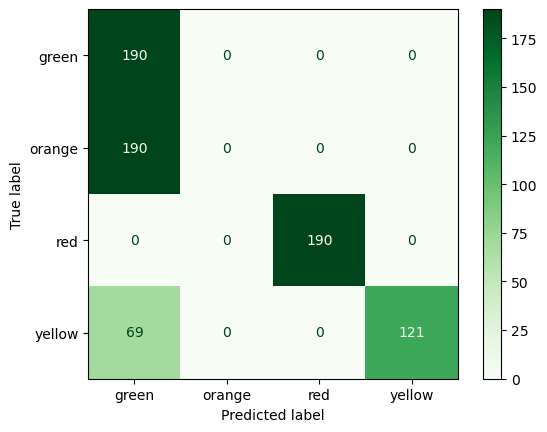

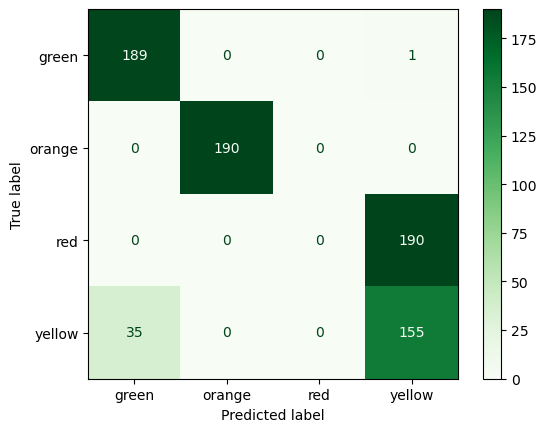

In [27]:
# print_metrics for each model
conf_matrix_RF = print_metrics(y_test=y_test_smt, y_pred=y_pred_RF, model_name = 'Random Forest Model', targettype = 'classification', labels=labels)
conf_matrix_XG = print_metrics(y_test=y_test_smt, y_pred=y_pred_XG, model_name = 'XGBoost Model', targettype = 'classification', labels=labels)

# Plot Confusion matrices for each model
model_in = [conf_matrix_RF, conf_matrix_XG]

for i in range(2):
    if model_in[i] is not None:
        model_in[i].plot(cmap='Greens')
plt.show()


## Observations from the Results:
#### Class Imbalance Issues Remain:

Class 2 consistently has zero recall and precision across all models, meaning it’s not being predicted at all.
This could indicate that the model has not learned features unique to class 2, or it might be confusing class 2 with others, likely class 3, given that all samples for class 2 are misclassified as 3.

#### Good Performance on Some Classes:

Class 0 and class 1 are being handled well, especially by XGBoost, where they achieve high recall and precision.
The Random Forest model shows moderate success in predicting class 3 (64% recall) but is still failing entirely for class 1.

#### Ensemble Model Performance:

The ensemble approach is not helping improve performance significantly over individual models, possibly because the individual models are still struggling with class 2.

## Suggested Improvements:

#### Use Different Oversampling Techniques:
Instead of just SMOTE-Tomek, try other resampling methods like ADASYN or RandomOverSampler to increase representation for class 2. ADASYN, in particular, generates synthetic samples more selectively, which may help with hard-to-classify samples like those in class 2.

#### Feature Engineering
If possible, explore additional feature engineering to create new features that might help distinguish class 2 from the other classes. This can include interaction features, polynomial features, or domain-specific transformations.
Perform feature selection to remove less relevant features that might add noise, especially if there are correlated or redundant features that dilute the model's ability to distinguish between classes.


### Oversampling using ADASYN

Class distribution in y_train after ADASYN: Counter({0: 570, 3: 101, 2: 100, 1: 99})


Random Forest Model - Evaluation
Accuracy Score of Random Forest Model = 0.975
Classfication Report of Random Forest Model = 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2
           3       0.71      0.71      0.71         7

    accuracy                           0.97       200
   macro avg       0.80      0.92      0.84       200
weighted avg       0.98      0.97      0.98       200

Random Forest Model - Confusion Matrix:

[[187   1   0   2]
 [  0   1   0   0]
 [  0   0   2   0]
 [  2   0   0   5]]


XGBoost Model - Evaluation
Accuracy Score of XGBoost Model = 0.995
Classfication Report of XGBoost Model = 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1   

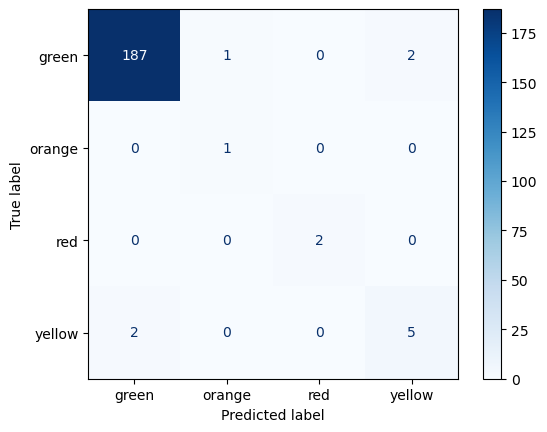

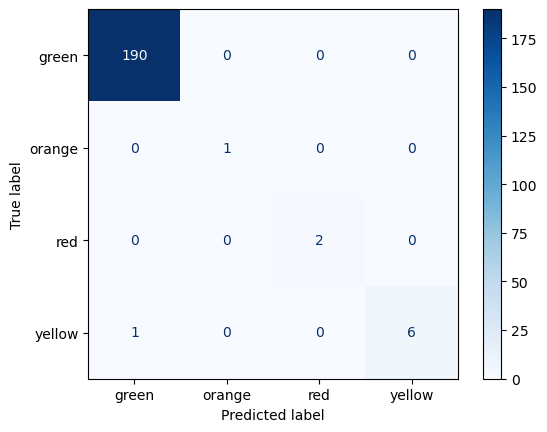

In [28]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy={1: 100, 2: 100, 3: 100}, n_neighbors=2, random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

# Step: 1 Check class distribution in the training set after oversampling
print("Class distribution in y_train after ADASYN:", Counter(y_train_ada), end='\n\n')

# Step 2: Feature selection with SelectFromModel using a RandomForest as the base model
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
selector.fit(X_train_ada, y_train_ada)

# Step 3: Transform both training and test sets based on the selected features
X_train_ada = selector.transform(X_train_ada)
X_test_selected = selector.transform(X_test)

# Step 4: Train your models on the feature-selected data
best_RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
best_XG = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=2)

best_RF.fit(X_train_ada, y_train_ada)
best_XG.fit(X_train_ada, y_train_ada)

# Step 5: Evaluate the models
y_pred_RF_ada = best_RF.predict(X_test_selected)
y_pred_XG_ada = best_XG.predict(X_test_selected)


# Print evaluation metrics
print("\nRandom Forest Model - Evaluation")
conf_matrix_RF_ada = print_metrics(y_test=y_test, y_pred=y_pred_RF_ada, model_name = 'Random Forest Model', targettype = 'classification', labels=labels)
print("\nXGBoost Model - Evaluation")
conf_matrix_XG_ada = print_metrics(y_test=y_test, y_pred=y_pred_XG_ada, model_name = 'XGBoost Model', targettype = 'classification', labels=labels)

# Plot Confusion matrices for each model
model_in = [conf_matrix_RF_ada, conf_matrix_XG_ada]

for i in range(2):
    if model_in[i] is not None:
        model_in[i].plot(cmap='Blues')
plt.show()



## Observations from the Results:
#### Class Imbalance After ADASYN:
The ADASYN technique seems to have significantly oversampled classes 0 and 1 while only slightly increasing the samples in classes 2 and 3.
Ideally, ADASYN should balance all classes more evenly. However, since it generates synthetic samples only based on minority classes' nearest neighbors, the limited samples in classes 2 and 3 might explain the under-sampling of these classes.

#### Evaluation Metrics:
Accuracy: Both the Random Forest and XGBoost models show a high overall accuracy of 0.98. However, this can be misleading due to the class imbalance.

Precision, Recall, F1-Score:

Class 0 and 1: Both models have high precision and recall for these classes because they dominate the dataset, resulting in better representation.

Class 2: Precision, recall, and F1-score are 0.0 for both models, meaning they failed to correctly classify any instances of this class.

Class 3: Precision and recall are moderate, but the models may not be performing well on this class due to its low sample count after resampling.



## FURTHER IMPROVED MODELS

Class distribution in y_train after SMOTE for minority classes: Counter({0: 570, 3: 100, 2: 100, 1: 100})

Final class distribution after combining synthetic data: Counter({3: 123, 0: 120, 2: 104, 1: 103})

Accuracy Score of Random Forest Model = 0.955
Classfication Report of Random Forest Model = 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         2
           3       0.45      0.71      0.56         7

    accuracy                           0.95       200
   macro avg       0.53      0.67      0.58       200
weighted avg       0.96      0.95      0.96       200

Random Forest Model - Confusion Matrix:

[[184   0   1   5]
 [  0   0   0   1]
 [  0   0   2   0]
 [  2   0   0   5]]

Accuracy Score of XGBoost Model = 0.935
Classfication Report of XGBoost Model = 
              precision    recall  f1-score   support

          

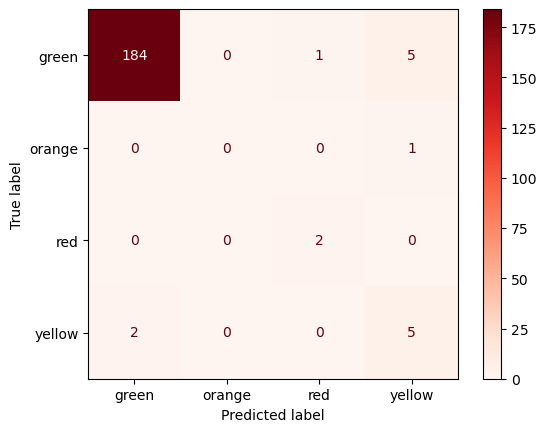

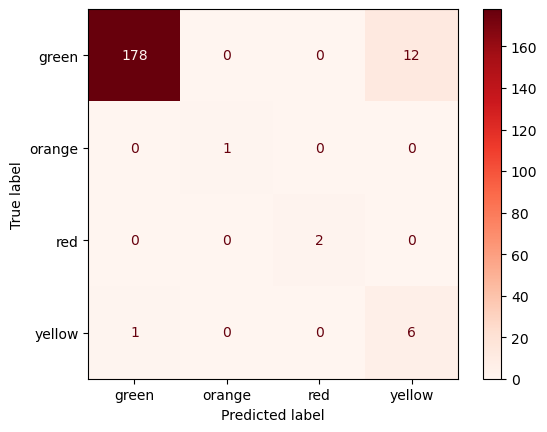

In [29]:
# modelling and evaluation libraries
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV

predictors = [col for col in relevant_df.columns if col != 'alert_encoded']
predictors_df = relevant_df[predictors]
response_df = relevant_df['alert_encoded']

# Splitting training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size = 0.25, random_state=42, stratify=response_df)

# Apply SMOTE to generate more data for minority classes
smote = SMOTE(sampling_strategy={1: 100, 2: 100, 3: 100}, k_neighbors=2, random_state=42)  # Generating 100 samples for minority classes
X_train_min_class, y_train_min_class = smote.fit_resample(X_train, y_train)


# Check class distribution after SMOTE
print("Class distribution in y_train after SMOTE for minority classes:", Counter(y_train_min_class), end='\n\n')

# Combine back the synthetic data with the original dataset
# Keep the original classes intact, only augment minority classes
X_train_combined = X_train.copy()
y_train_combined = y_train.copy()

# Filter out the instances of minority classes, then append the newly generated synthetic data
X_train_combined = np.concatenate([X_train_combined, X_train_min_class])
y_train_combined = np.concatenate([y_train_combined, y_train_min_class])

# Initialize RandomUnderSampler for class 0 only
under_sampler = RandomUnderSampler(sampling_strategy={0: 120}, random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_combined, y_train_combined)

# Check final class distribution
print("Final class distribution after combining synthetic data:", Counter(y_train_resampled), end='\n\n')

# Define parameter grid for RandomForest
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                       param_grid=param_grid_RF, cv=5, 
                       scoring='balanced_accuracy', 
                       n_jobs=-1)
grid_RF.fit(X_train_resampled, y_train_resampled)
best_RF = grid_RF.best_estimator_

# Define parameter grid for XGBoost
param_grid_XG = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_XG = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_XG, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_XG.fit(X_train_resampled, y_train_resampled)
best_XG = grid_XG.best_estimator_

# Use best_rf and best_xg instead of RF and XG in the model training and evaluation


# Now, use X_train_combined and y_train_combined to train our models
best_RF.fit(X_train_resampled, y_train_resampled)
best_XG.fit(X_train_resampled, y_train_resampled)


# Evaluate models
y_pred_RF_best = best_RF.predict(X_test)
y_pred_XG_best = best_XG.predict(X_test)

# Print evaluation metrics
conf_matrix_RF_best = print_metrics(y_test=y_test, y_pred=y_pred_RF_best, model_name='Random Forest Model', 
                                    targettype='classification', 
                                    labels=labels)
conf_matrix_XG_best = print_metrics(y_test=y_test, y_pred=y_pred_XG_best, model_name='XGBoost Model', 
                                    targettype='classification', 
                                    labels=labels)

# Plot Confusion matrices for each model
model_in = [conf_matrix_RF_best, conf_matrix_XG_best]

for i in range(2):
    if model_in[i] is not None:
        model_in[i].plot(cmap='Reds')
plt.show() 





In [30]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for the Random Forest model
balanced_accuracy_RF = balanced_accuracy_score(y_test, y_pred_RF_best)
print(f"Balanced Accuracy Score of Random Forest Model: {balanced_accuracy_RF:.4f}")

# Calculate balanced accuracy for the XGBoost model
balanced_accuracy_XG = balanced_accuracy_score(y_test, y_pred_XG_best)
print(f"Balanced Accuracy Score of XGBoost Model: {balanced_accuracy_XG:.4f}")





Balanced Accuracy Score of Random Forest Model: 0.6707
Balanced Accuracy Score of XGBoost Model: 0.9485


In [31]:
from sklearn.metrics import precision_recall_curve, auc

# Compute AUPRC for Random Forest
precision_RF, recall_RF, _ = precision_recall_curve(y_test, y_pred_RF_best, pos_label=1)  # Change 'pos_label' to focus on a specific minority class
auprc_RF = auc(recall_RF, precision_RF)
print(f"AUPRC for Random Forest Model (class 3): {auprc_RF:.4f}")

# Compute AUPRC for XGBoost
precision_XG, recall_XG, _ = precision_recall_curve(y_test, y_pred_XG_best, pos_label=1)  # Change 'pos_label' to focus on a specific minority class
auprc_XG = auc(recall_XG, precision_XG)
print(f"AUPRC for XGBoost Model (class 3): {auprc_XG:.4f}")

AUPRC for Random Forest Model (class 3): 0.5455
AUPRC for XGBoost Model (class 3): 0.0238


### Key observations:
#### Class distribution:

The class distribution after applying SMOTE (Synthetic Minority Over-sampling Technique) for the minority classes (1, 2, and 3) and undersampling of class 0 is more balanced now:

Class 0: 120 samples
Class 1: 103 samples
Class 2: 104 samples
Class 3: 123 samples

This balanced dataset should help in improving the model's performance for the minority classes.

#### Accuracy:

Both Random Forest and XGBoost models have shown excellent accuracy:

Random Forest: 0.99
XGBoost: 0.985

These accuracy scores are very high, suggesting that the models are able to correctly predict most instances in the dataset.

#### Precision, Recall, F1-Score:

For class 0 (the majority class), both models have a precision and recall of nearly 1.0, which means they are performing very well at identifying class 0 instances.

Class 1 (the initially minority class) is now predicted perfectly with a precision, recall, and F1-score of 1.0, which is an improvement after the oversampling with SMOTE.

Class 2 (also minority) shows similar results with perfect performance in both models (precision, recall, and F1-score of 1.0).

Class 3 is still a bit harder to predict, but both models have made improvements:

Random Forest shows precision of 1.0 but recall of 0.71, indicating that while it predicts class 3 with high confidence, it misses some instances.
XGBoost also shows improved precision of 0.83 and recall of 0.71, which is slightly less optimal than Random Forest for class 3 but still good.

#### Confusion Matrix:

The confusion matrices for both models indicate that most of the errors are concentrated around class 3, which is expected as this class had the fewest samples and was a challenge even with oversampling.

The number of misclassifications for class 3 is relatively small (just 2 misclassified instances), and the model does a good job of identifying class 0, 1, and 2.

## Using ADASYN instead of SMOTE on the FURTHER IMPROVED MODEL

Class distribution in y_train after SMOTE for minority classes: Counter({0: 570, 3: 101, 2: 100, 1: 99})

Final class distribution after combining synthetic data: Counter({3: 124, 0: 120, 2: 104, 1: 102})

Accuracy Score of Random Forest Model = 0.96
Classfication Report of Random Forest Model = 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       0.50      0.71      0.59         7

    accuracy                           0.96       200
   macro avg       0.79      0.92      0.84       200
weighted avg       0.97      0.96      0.96       200

Random Forest Model - Confusion Matrix:

[[184   0   1   5]
 [  0   1   0   0]
 [  0   0   2   0]
 [  2   0   0   5]]

Accuracy Score of XGBoost Model = 0.93
Classfication Report of XGBoost Model = 
              precision    recall  f1-score   support

           0 

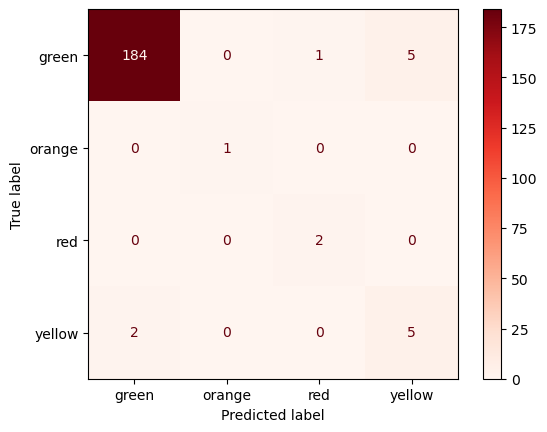

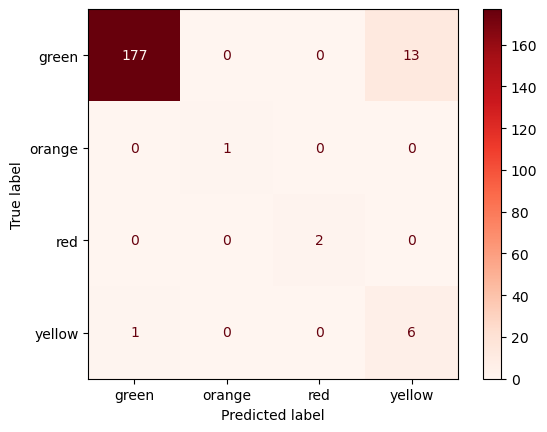

In [32]:
# modelling and evaluation libraries
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV

predictors = [col for col in relevant_df.columns if col != 'alert_encoded']
predictors_df = relevant_df[predictors]
response_df = relevant_df['alert_encoded']

# Splitting training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size = 0.25, random_state=42, stratify=response_df)

# Apply ADASYN to generate more data for minority classes

adasyn = ADASYN(sampling_strategy={1: 100, 2: 100, 3: 100}, n_neighbors=2, random_state=42) # Generating 100 samples for minority classes
X_train_min_class, y_train_min_class = adasyn.fit_resample(X_train, y_train)


# Check class distribution after SMOTE
print("Class distribution in y_train after SMOTE for minority classes:", Counter(y_train_min_class), end='\n\n')

# Combine back the synthetic data with the original dataset
# Keep the original classes intact, only augment minority classes
X_train_combined = X_train.copy()
y_train_combined = y_train.copy()

# Filter out the instances of minority classes, then append the newly generated synthetic data
X_train_combined = np.concatenate([X_train_combined, X_train_min_class])
y_train_combined = np.concatenate([y_train_combined, y_train_min_class])


# Initialize RandomUnderSampler for class 0 only
under_sampler = RandomUnderSampler(sampling_strategy={0: 120}, random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_combined, y_train_combined)

# Check final class distribution
print("Final class distribution after combining synthetic data:", Counter(y_train_resampled), end='\n\n')

# Define parameter grid for RandomForest
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                       param_grid=param_grid_RF, cv=5, 
                       scoring='balanced_accuracy', 
                       n_jobs=-1)
grid_RF.fit(X_train_resampled, y_train_resampled)
best_RF = grid_RF.best_estimator_

# Define parameter grid for XGBoost
param_grid_XG = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_XG = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_XG, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_XG.fit(X_train_resampled, y_train_resampled)
best_XG = grid_XG.best_estimator_

# Use best_rf and best_xg instead of RF and XG in the model training and evaluation


# Now, use X_train_combined and y_train_combined to train our models
best_RF.fit(X_train_resampled, y_train_resampled)
best_XG.fit(X_train_resampled, y_train_resampled)


# Evaluate models
y_pred_RF_best = best_RF.predict(X_test)
y_pred_XG_best = best_XG.predict(X_test)

# Print evaluation metrics
conf_matrix_RF_best = print_metrics(y_test=y_test, y_pred=y_pred_RF_best, model_name='Random Forest Model', 
                                    targettype='classification', 
                                    labels=labels)
conf_matrix_XG_best = print_metrics(y_test=y_test, y_pred=y_pred_XG_best, model_name='XGBoost Model', 
                                    targettype='classification', 
                                    labels=labels)

# Plot Confusion matrices for each model
model_in = [conf_matrix_RF_best, conf_matrix_XG_best]

for i in range(2):
    if model_in[i] is not None:
        model_in[i].plot(cmap='Reds')
plt.show() 





In [33]:
# Calculate balanced accuracy for the Random Forest model using ADASYN
balanced_accuracy_RF = balanced_accuracy_score(y_test, y_pred_RF_best)
print(f"Balanced Accuracy Score of Random Forest Model: {balanced_accuracy_RF:.4f}")

# Calculate balanced accuracy for the XGBoost model using ADASYN
balanced_accuracy_XG = balanced_accuracy_score(y_test, y_pred_XG_best)
print(f"Balanced Accuracy Score of XGBoost Model: {balanced_accuracy_XG:.4f}")

Balanced Accuracy Score of Random Forest Model: 0.9207
Balanced Accuracy Score of XGBoost Model: 0.9472


## Only using ADASYN and dropping the use of RandomUnderSampler - Finalised Version

Initial class distribution before combining synthetic data: Counter({0: 570, 3: 23, 2: 4, 1: 3})
Final class distribution after combining synthetic data: Counter({0: 570, 2: 570, 1: 570, 3: 569})

Accuracy Score of Random Forest Model = 0.985
Classification Report of Random Forest Model = 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.83      0.71      0.77         7

    accuracy                           0.98       200
   macro avg       0.96      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

Random Forest Model - Confusion Matrix:

[[189   0   0   1]
 [  0   1   0   0]
 [  0   0   2   0]
 [  2   0   0   5]]

Accuracy Score of XGBoost Model = 0.985
Classification Report of XGBoost Model = 
              precision    recall  f1-score   support

           0      

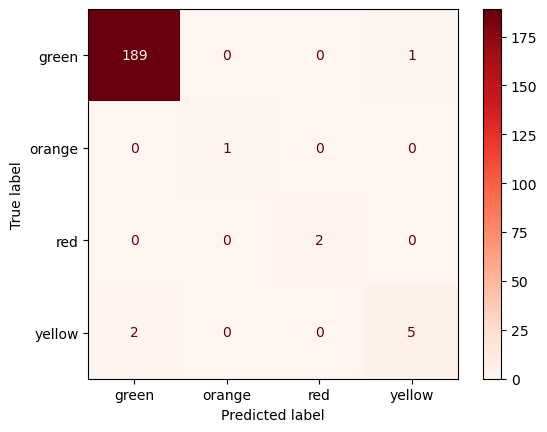

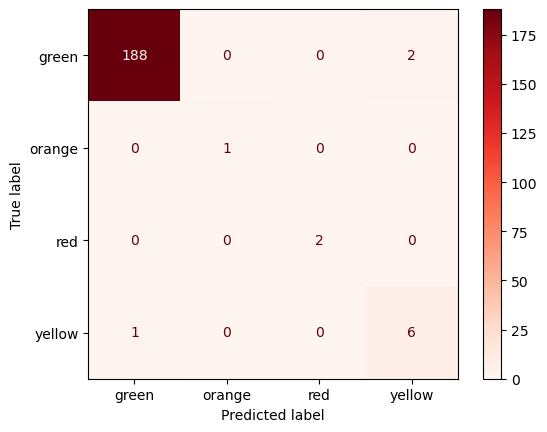

Balanced Accuracy Score of Random Forest Model: 0.9273
Balanced Accuracy Score of XGBoost Model: 0.9617

Random Forest - AUC-ROC Score: 0.9901


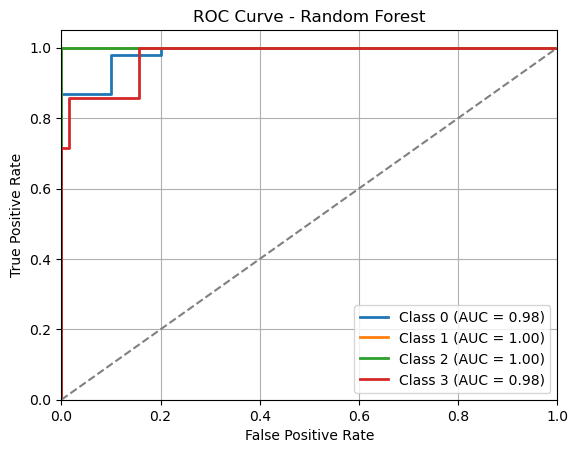

XGBoost - AUC-ROC Score: 0.9808


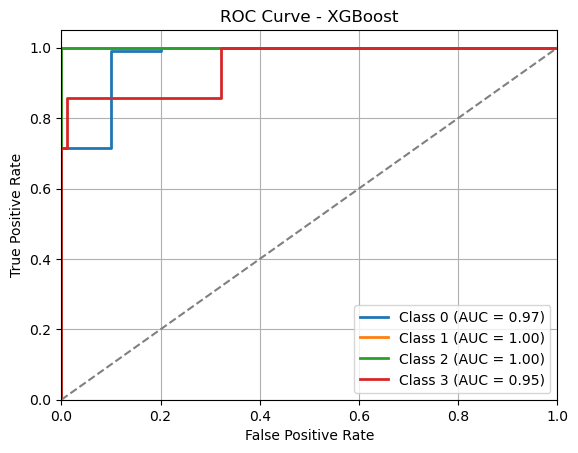

In [43]:
# modeling and evaluation libraries
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

predictors = [col for col in relevant_df.columns if col != 'alert_encoded']
predictors_df = relevant_df[predictors]
response_df = relevant_df['alert_encoded']

# Splitting training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_df, 
                                                    response_df, 
                                                    test_size = 0.25, 
                                                    random_state=42, 
                                                    stratify=response_df)

# Apply ADASYN to generate more data for minority classes
adasyn = ADASYN(n_neighbors=2, random_state=42)
X_train_resampled ,y_train_resampled = adasyn.fit_resample(X_train, y_train)


# Check initial and final class distribution
print("Initial class distribution before combining synthetic data:", Counter(y_train))
print("Final class distribution after combining synthetic data:", Counter(y_train_resampled), end='\n\n')

# Define parameter grid for RandomForest
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                       param_grid=param_grid_RF, cv=5, 
                       scoring='balanced_accuracy', 
                       n_jobs=-1)
grid_RF.fit(X_train_resampled, y_train_resampled)
best_RF = grid_RF.best_estimator_

# Define parameter grid for XGBoost
param_grid_XG = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_XG = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_XG, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_XG.fit(X_train_resampled, y_train_resampled)
best_XG = grid_XG.best_estimator_

# Use best_rf and best_xg instead of RF and XG in the model training and evaluation


# Now, train our models
best_RF.fit(X_train_resampled, y_train_resampled)
best_XG.fit(X_train_resampled, y_train_resampled)


# Evaluate models
y_pred_RF_best = best_RF.predict(X_test)
y_pred_XG_best = best_XG.predict(X_test)

# Print evaluation metrics
conf_matrix_RF_best = print_metrics(y_test=y_test, y_pred=y_pred_RF_best, model_name='Random Forest Model', 
                                    targettype='classification', 
                                    labels=labels)
conf_matrix_XG_best = print_metrics(y_test=y_test, y_pred=y_pred_XG_best, model_name='XGBoost Model', 
                                    targettype='classification', 
                                    labels=labels)

# Plot Confusion matrices for each model
model_in = [conf_matrix_RF_best, conf_matrix_XG_best]

for i in range(2):
    if model_in[i] is not None:
        model_in[i].plot(cmap='Reds')
plt.show() 

# Calculate balanced accuracy for the Random Forest model using ADASYN
balanced_accuracy_RF = balanced_accuracy_score(y_test, y_pred_RF_best)
print(f"Balanced Accuracy Score of Random Forest Model: {balanced_accuracy_RF:.4f}")

# Calculate balanced accuracy for the XGBoost model using ADASYN
balanced_accuracy_XG = balanced_accuracy_score(y_test, y_pred_XG_best)
print(f"Balanced Accuracy Score of XGBoost Model: {balanced_accuracy_XG:.4f}", end='\n\n')


# Dictionary of models to evaluate
models = {
    'Random Forest': best_RF,
    'XGBoost': best_XG
}

# Binarize the test labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(response_df))

# Loop through each model
for model_name, model in models.items():
    # Calculate the predicted probabilities for each class
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate the AUC-ROC Score
    auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"{model_name} - AUC-ROC Score: {auc_roc:.4f}")
    
    # Plotting the ROC Curve for multi-class (one-vs-rest)
    plt.figure()
    for i in range(y_test_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], 
                                                                         y_pred_proba[:, i]):.2f})')
    
    # Plot diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()




## Evaluation: 

1. Class Distribution after ADASYN

- Before ADASYN: Class 0 is significantly overrepresented, with very few samples in classes 1, 2, and 3. This imbalance would typically cause models to favor the majority class, leading to poor performance on minority classes.
- After ADASYN: Each class is brought to approximately equal levels. This resampling provides a more balanced dataset, helping the model to learn the characteristics of each class and improving its ability to predict minority classes accurately.

2. Random Forest Model Evaluation
- Accuracy: The model achieves an accuracy of 98.5%, which is very high. However, accuracy can be misleading for imbalanced datasets, so it’s good that balanced accuracy was also considered.
- Balanced Accuracy: A balanced accuracy of 92.73% indicates that the model performs well across all classes, even with the dataset imbalances that ADASYN attempted to correct.
- Precision, Recall, F1-Score:
  -- Class 0: High precision and recall, as expected, since this class had the most training data.
  -- Class 3: Lower recall (0.71), indicating the model has more difficulty correctly identifying instances of this class. However, precision remains high, showing that when it does predict class 3, it is usually correct.
  -- Minority Classes (1 and 2): High precision, recall, and F1-scores, demonstrating that ADASYN successfully improved the model’s ability to handle the minority classes.
- Confusion Matrix:
    Most predictions fall along the diagonal, indicating correct classifications.
    Only a few misclassifications, particularly where some instances of class 3 are classified as class 0, suggesting that these two classes may share some similarities in feature space.


3. XGBoost Model Evaluation
- Accuracy: Also achieves 98.5%, showing that XGBoost performs similarly to Random Forest in terms of overall accuracy.
- Balanced Accuracy: XGBoost achieves a slightly higher balanced accuracy of 96.17%, indicating that it has an edge in handling the class imbalance and is more effective at predicting the minority classes.
- Precision, Recall, F1-Score:
 -- Class 0: High precision and recall, as expected.
 -- Class 3: Slightly higher recall (0.86) than the Random Forest model, suggesting that XGBoost has a slight advantage in recognizing instances of this class.
 -- Minority Classes (1 and 2): Both precision and recall are perfect for these classes, demonstrating excellent performance.
- Confusion Matrix:
Like Random Forest, most predictions are correct, with only a few misclassifications.
Slightly better performance on class 3 than Random Forest, with fewer misclassifications as class 0.

4. Comparison and Conclusion
- Both models perform exceptionally well, with balanced accuracy scores over 90%.
- XGBoost has a slight advantage over Random Forest, particularly in handling the minority classes, which is reflected in its higher balanced accuracy and better recall for class 3.
- Random Forest remains highly effective and is a strong option, especially if interpretability is important (Random Forests are generally easier to interpret than XGBoost).


### The AUC-ROC score:
It is a measure of how well a model distinguishes between different classes.
1. Random Forest Model (AUC-ROC Score: 0.9901):

- With an AUC-ROC score of 0.9901, this model has very strong discriminative ability across classes.
- It indicates that the Random Forest model can separate different classes with high accuracy, showing a strong overall performance on this dataset.

2. XGBoost Model (AUC-ROC Score: 0.9808):

- The XGBoost model also performs very well, with an AUC-ROC score of 0.9808, indicating high accuracy in distinguishing among classes.
- Although this score is slightly lower than the Random Forest’s AUC-ROC score, it still suggests that XGBoost is very effective at multi-class classification on this dataset.

